# Multiple Linear Regression
아래처럼, 여러개의 features 를 기반으로, 수익을 예측하려 한다.
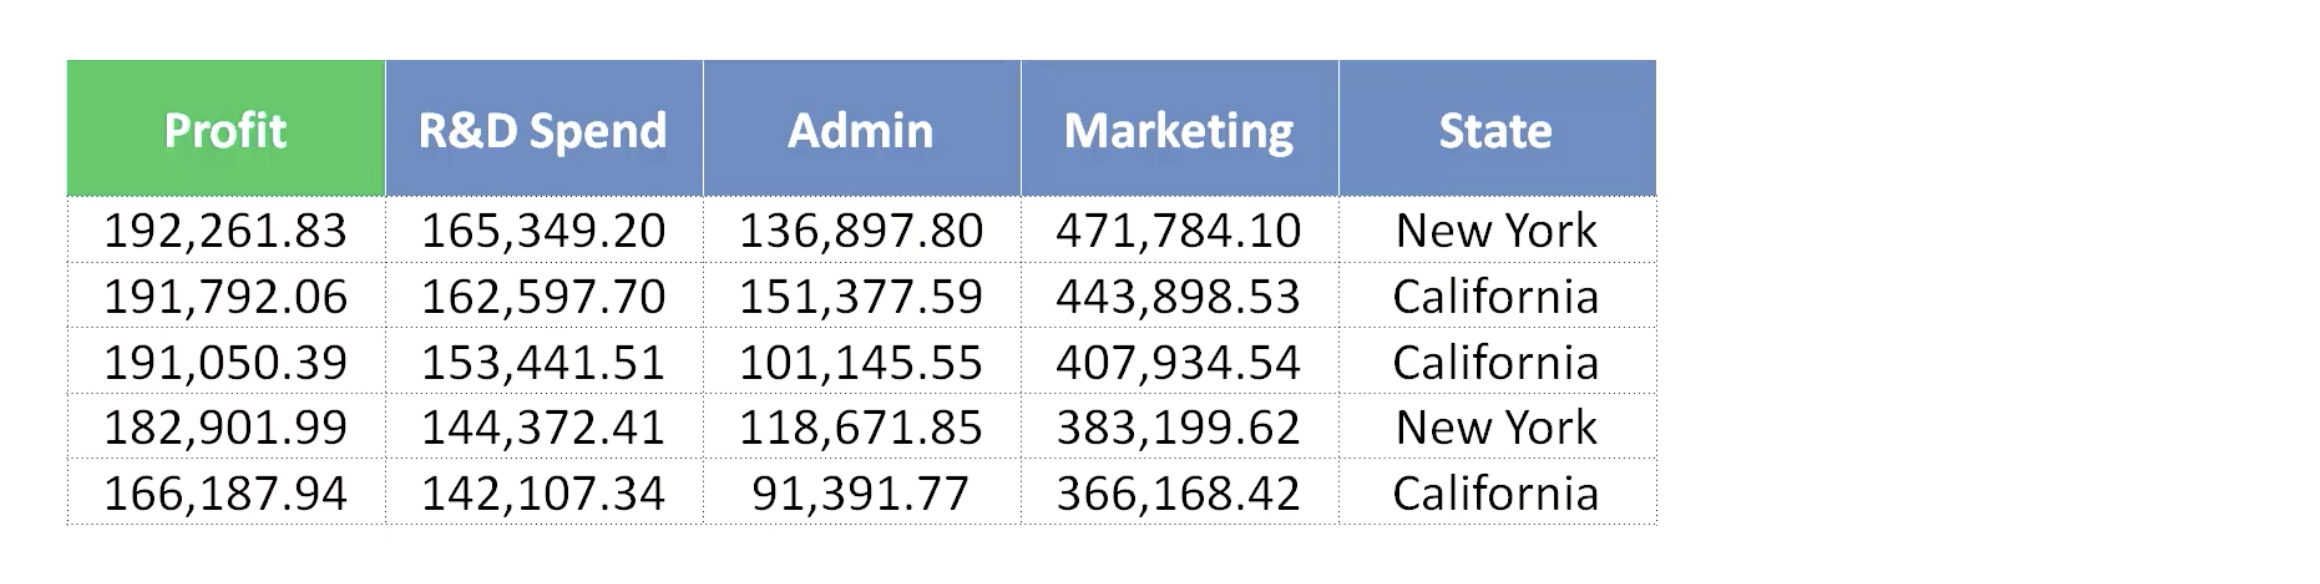

위와 같이, 여러개의 변수들을 통해, 수익과의 관계를 분석하고,    
이를 통해, 새로운 데이터가 들어왔을 때, 수익이 어떻게 될 지를 예측하고자 한다.    

아래는 하나의 변수일때와, 여러개의 변수가 있을때의 leaner regression 을 나타낸다.    
2차원에서는 선 이지만, 3차원에서는 평면이 된다.    

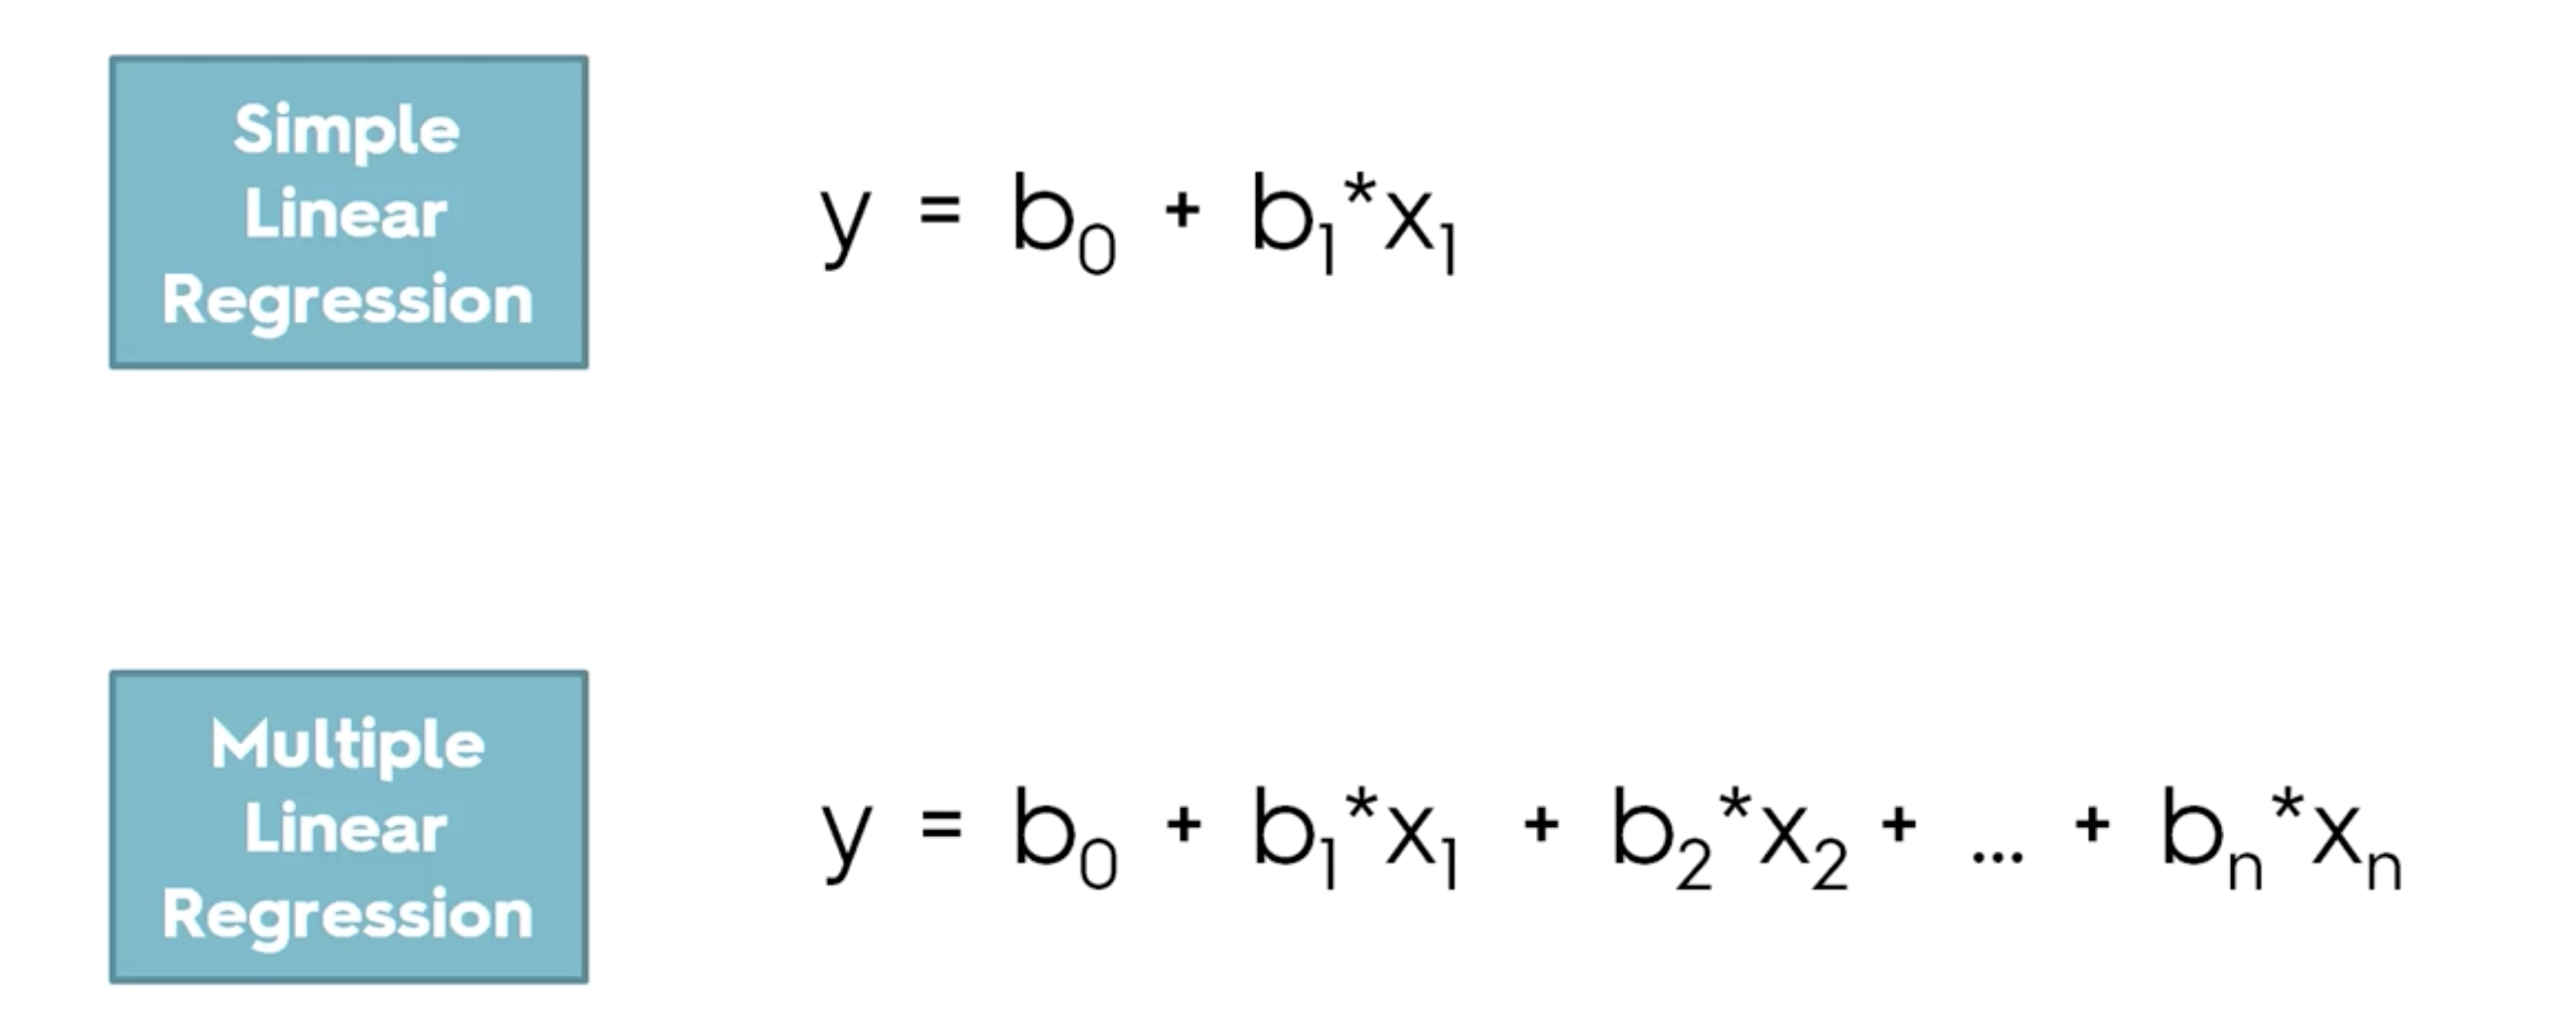

# 이제, 오차가 가장 적을때의 b 값들을 찾아보자.

In [1]:
# Profit(수익)을 예측하려 한다.  
# Profit : 종속 변수(Dependent Variable)
# 나머지 : 독립 변수(Independent Variable)

## 1. 먼저 식을 세운다. 이때 숫자가 아닌값은 어떻게 처리해야 할까?
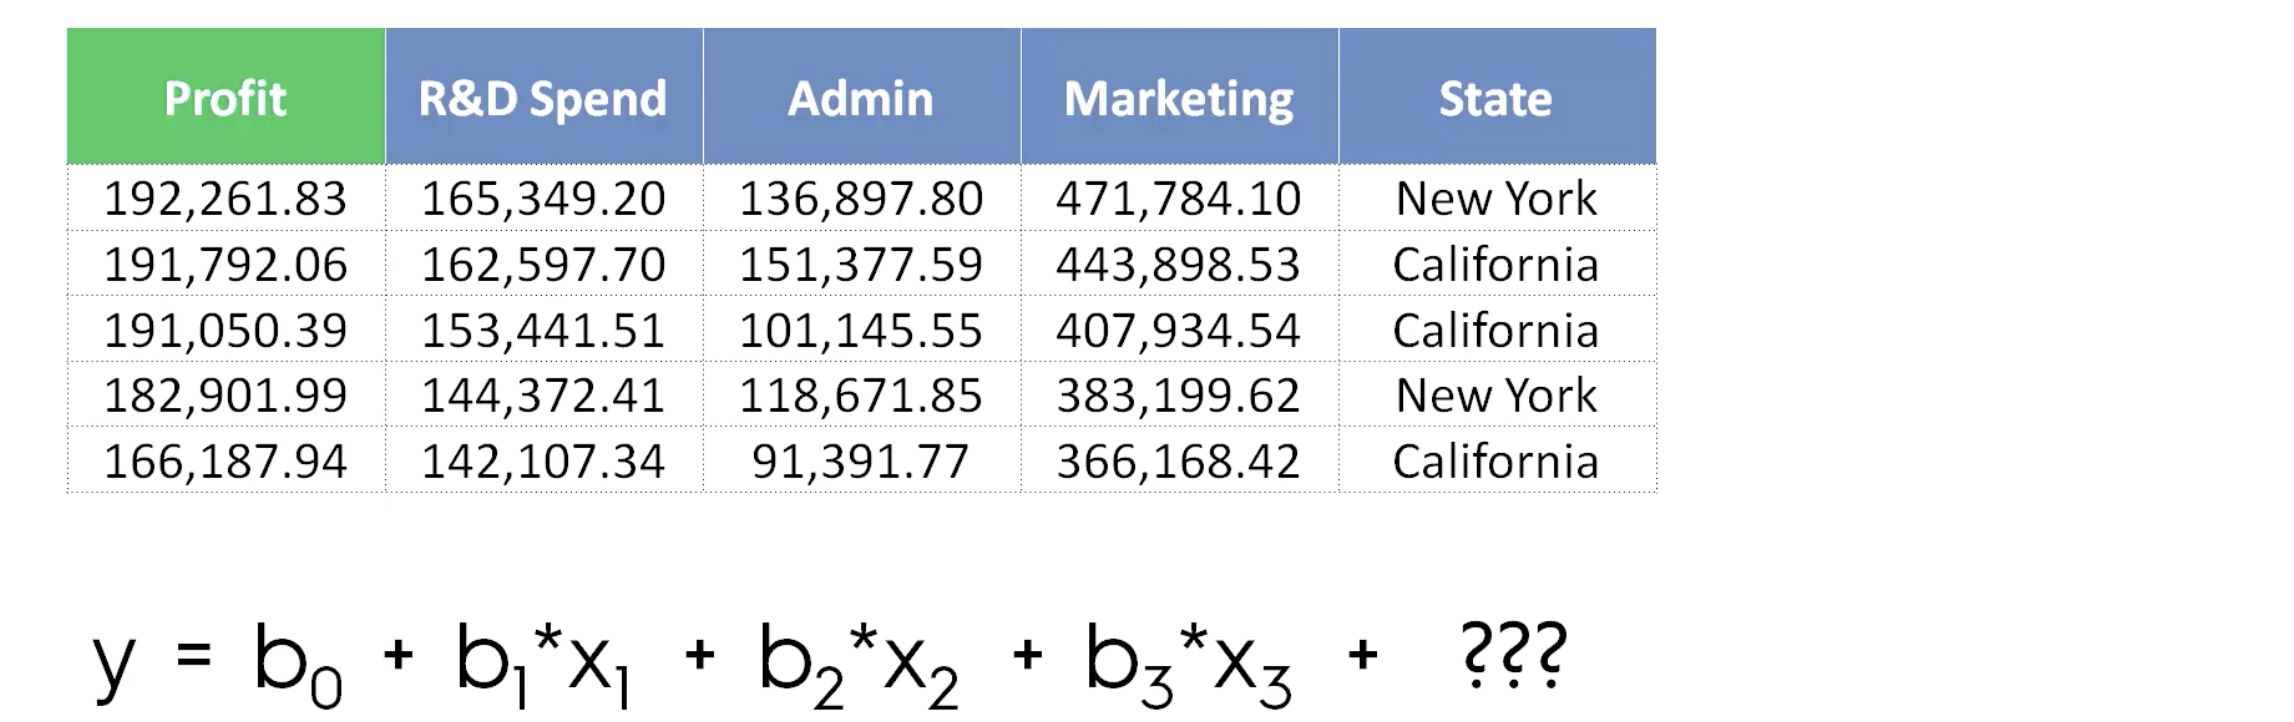

## [목표]
- 투자한 회사들이 어디에 투자를 하고, 어디에 위치했는 지에 따른 수익 예측 모델 만들기
- 신규 투자를 할 때, 의사결정 참고자료로 사용함

# lib와 데이터 로딩

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

50_Startups.csv 데이터를 읽으세요.
- 각각의 피쳐를 분석하여, 어떤 신생 회사의 데이터가 있으면, 그 회사가 얼마의 수익을 낼 지 예측합니다. (투자를 해야 할지 말아야 할지)
- 미국 투자 회사 정보, 투자한 회사의 수익 데이터

In [3]:
df = pd.read_csv('datas_ml/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.describe(include='object')

,State
count,50
unique,3
top,New York
freq,17


In [7]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

# X, y 데이터 분리

In [8]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [9]:
y = df['Profit']

In [10]:
X = df.loc[:,'R&D Spend': 'State' ]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


# 데이터 전처리

In [11]:
X['State'].nunique()

3

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
# remainder='passthrough' 나머지는 통과시켜라는 뜻
ct = ColumnTransformer([('encoder', OneHotEncoder(), [3]) ], remainder='passthrough')

In [15]:
# onehotencoding 수행
X = ct.fit_transform(X)

In [18]:
type(X)

numpy.ndarray

In [19]:
X[: 5]

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05]])

# 학습용과 테스트용으로 나눔

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# 학습 8:테스트 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [23]:
X_train.shape, y_train.shape

((40, 6), (40,))

In [26]:
X_test.shape, y_test.shape

((10, 6), (10,))

# 모델 학습

In [22]:
from sklearn.linear_model import LinearRegression

In [27]:
# 객체 생성
lr_model = LinearRegression()

In [28]:
# 데이터 학습
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
# 회귀선의 기울기
lr_model.coef_

array([-4.31767824e+02, -1.55681873e+03,  1.98858655e+03,  8.08286664e-01,
       -2.61729246e-02,  3.07501226e-02])

In [30]:
# 회귀선의 편차
lr_model.intercept_

np.float64(48803.932588414704)

# 모델 성능 평가

In [47]:
y_pred = y_hat
y_hat = (-4.31767824e+02*1, -1.55681873e+03*2,  1.98858655e+03*3,  8.08286664e-01*4,
       -2.61729246e-02*5,  3.07501226e-02*6) + 48803.932588414704

NameError: name 'y_hat' is not defined

In [35]:
# 테스트
y_pred = lr_model.predict(X_test)


In [37]:
# MSE
((y_test - y_pred)**2).mean()

np.float64(100911162.80590256)

In [38]:
# 오차 결과 : RMSE
np.sqrt(((y_test - y_pred)**2).mean())

np.float64(10045.454833202057)

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [43]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_s = r2_score(y_test, y_pred)

In [45]:
print(f'rmse={np.square(mse)}={mse}\n mae={mae} \n r2_s= {r2_s}')

rmse=1.0183062778839372e+16=100911162.80590256
 mae=7917.874510656649 
 r2_s= 0.8998123419674642


# 실제값과 예측값 시각화

In [39]:
df_test = y_test.to_frame()

In [40]:
df_test

,Profit
13,134307.35
15,129917.04
22,110352.25
42,71498.49
30,99937.59
27,105008.31
1,191792.06
20,118474.03
10,146121.95
36,90708.19


In [48]:
df_test['y_pred'] = y_pred

In [49]:
df_test

,Profit,y_pred
13,134307.35,126951.562112
15,129917.04,148200.835666
22,110352.25,113169.450696
42,71498.49,69514.301556
30,99937.59,97132.051584
27,105008.31,116589.986827
1,191792.06,189485.657238
20,118474.03,116210.871695
10,146121.95,133774.253314
36,90708.19,73274.890585


In [50]:
# 인덱스 리셋
df_test = df_test.reset_index(drop=True)

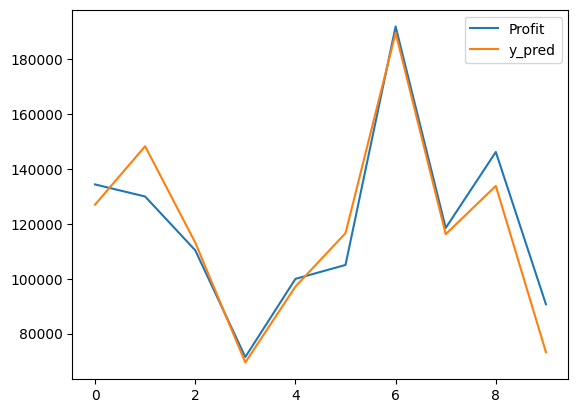

In [52]:
# 인덱스 리셋
df_test = df_test.reset_index(drop=True)
# 실제값과 예측 오차 시각화
df_test.plot()
plt.show()

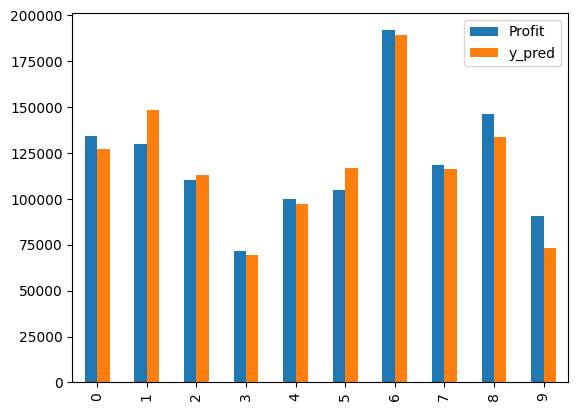

In [53]:
# 실제값과 예측 오차 시각화
df_test.plot(kind='bar')
plt.show()


# 일반화 테스트
- 실제 값을 넣어보기

In [55]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [89]:
X_test[:3]

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.1992390e+04,
        1.3549507e+05, 2.5266493e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.1452361e+05,
        1.2261684e+05, 2.6177623e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 7.3994560e+04,
        1.2278275e+05, 3.0331926e+05]])

In [88]:
X[:3]

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05]])

In [87]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [54]:
# 저희회사는
# 운영비 15만달라, 마테팅비 40만달라, 연구개발비는 13만달러 쓰고 있습니다. 회사 위치는 플로리다에 있습니다.

In [84]:
real_data = [
    0, 1, 0,          # Florida One-Hot
    130000,           # R&D Spend
    150000,           # Administration
    400000            # Marketing Spend
]

X_real = np.array(real_data).reshape(1, -1)
X_real.shape

(1, 6)

In [85]:
y_real_pred = lr_model.predict(X_real)
y_real_pred

array([160698.49053132])

[실습]

- A회사는 운영비는 15만달라, 마케팅비는 40만달라, 연구개발비는 13만달라고 회사위치는 Florida에 있음
- B회사는 운영비는 11만달라, 마케팅비는 60만달라, 연구개발비는 15만달라고 회사위치는 NewYork
- 이 두 회사의 수익을 예측하세요.
- predict 함수에 한번에 넣어서, 두 회사의 결과를 한번에 확인하세요.

In [90]:
new_data = np.array([[0,1,0, 130000, 150000, 400000],
       [0,0,1, 150000, 110000, 600000]])

In [91]:
new_data

array([[     0,      1,      0, 130000, 150000, 400000],
       [     0,      0,      1, 150000, 110000, 600000]])

In [93]:
new_data_pred = lr_model.predict(new_data)
new_data_pred

array([160698.49053132, 187606.57059605])

# 모델 저장하기
- 예측을 잘 하면 서비스화를 위해 모델 저장하기

In [94]:
# 모델 직렬화(모델의 메모리 상태를 그대로 파일로 저장함)

In [97]:
import joblib
import os

In [98]:
os.makedirs('models', exist_ok=False)
joblib.dump(lr_model, 'models/lr_model.pkl')

['models/lr_model.pkl']

## 저장된 모델 로딩하여 테스트

In [99]:
ai = joblib.load('models/lr_model.pkl')

In [100]:
ai.predict(new_data)

array([160698.49053132, 187606.57059605])